In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics  import accuracy_score, f1_score
import re
%matplotlib inline

Q1: Total rows and columns in dataframe =  (14640, 15)


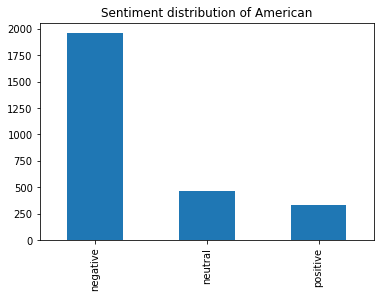

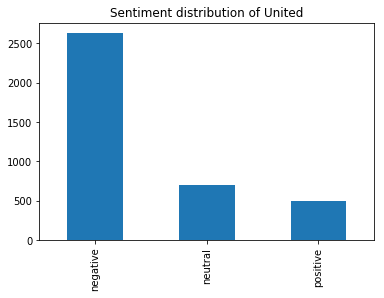

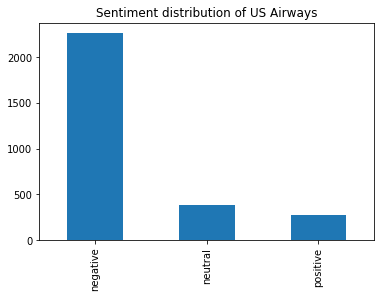

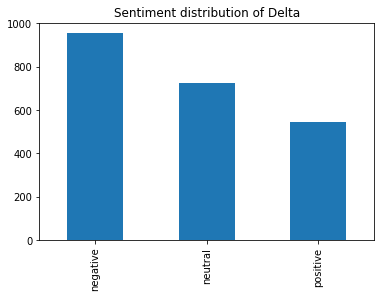

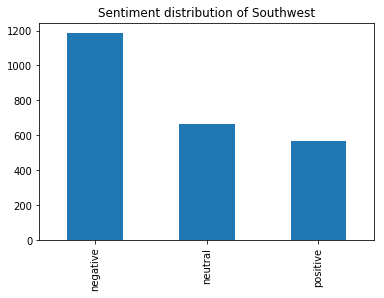

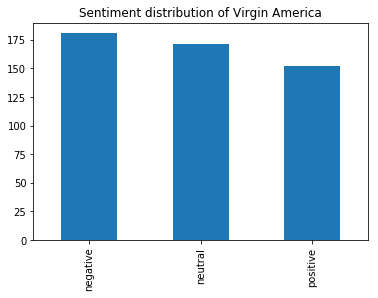

In [8]:
#Q1: Load all data and plot the sentiment distribution for each airline. 
#just need to plot neg, neutral, pos sentiments

df = pd.read_csv("Tweets.csv", header=0, delimiter=",", encoding = 'latin1')
print("Q1: Total rows and columns in dataframe = ", df.shape)
for one in (set(df.airline)):
    airline1 = df.loc[df['airline'] == one]
    airline1['airline_sentiment'].value_counts().plot(kind='bar')
    plt.title("Sentiment distribution of %s" % one)
    plt.show()

In [9]:
#Q2: Remove URLs and mentions and rename hashtag sign to ‘hashtag_’. 
#Vectorize tweets using count vectorizer. 

count = CountVectorizer(binary = False, min_df = 5, stop_words = 'english')
tfidf = TfidfVectorizer(min_df = .0005, stop_words = 'english')
protw =[]

regexp_url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
pattern_url = re.compile(regexp_url, re.UNICODE | re.IGNORECASE)
regexp_hashtag = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)'
pattern_hashtag = re.compile(regexp_hashtag, re.UNICODE | re.IGNORECASE)
regexp_mention = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)'
pattern_mention = re.compile(regexp_mention, re.UNICODE | re.IGNORECASE)

for tw in df['text']:
    temp = pattern_url.sub('', tw)     #removing URLs
    temp = pattern_mention.sub('', temp)  #Removing mentions
    temp = pattern_hashtag.sub(r'hashtag_\1', temp) #Changing hashtag sign (#) to 'hashtag_'
    protw.append(temp.encode('utf-8'))

#Count victorization of processed tweets
Xss = count.fit_transform(protw)
print("Q2: Count vectorization of tweets = " , Xss.shape)
df['text'] = protw

Q2: Count vectorization of tweets =  (14640, 2810)


In [23]:
#Q3: For each airline, train a logistic regression and perform 10-fold crossvalidation and report 
#the accuracy and F1 score (with weighted average). Analyze your result.
q3scores= []
scores=[]
for aline in set(df['airline']):
    dfi = df[df['airline']==aline]
    X = np.array(dfi['text'])
    y = np.array(dfi['airline_sentiment'])
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)

    KFold(n_splits=10, random_state=None, shuffle=False)
    for train_index, test_index in kf.split(X):
        X_train_text, X_valid_text = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        X_train = tfidf.fit_transform(X_train_text)
        X_valid = tfidf.transform(X_valid_text)

        LR = LogisticRegression(C=5)
        LR.fit(X_train, y_train)

        p_valid = LR.predict(X_valid)
        scores.append([accuracy_score(y_valid, p_valid), f1_score(y_valid, p_valid, average='weighted')])
    
    q3scores.append([aline, np.array(scores)[:,0].mean(0), np.array(scores)[:,1].mean(0)])
    scores =[]
q3scores = np.array(q3scores)
print("Q3: 10 fold cross validation of Logistic regression by airlines")
print(q3scores)


Q3: 10 fold cross validation of Logistic regression by airlines
[['American' '0.786166007905' '0.755029391953']
 ['United' '0.757975749457' '0.730761411488']
 ['US Airways' '0.81188509156' '0.776139090793']
 ['Delta' '0.687702500707' '0.681884340565']
 ['Southwest' '0.701239669421' '0.696824680564']
 ['Virgin America' '0.611137254902' '0.611158147548']]


From following graph, accuracy difference is around .2 across airlines.
Accuracy is highest for US Airways and lowest for Virgin America with range of 0.61-0.81
F1 score closely follows accuracy and highest for US Airways.
With information, we can see that it is easier to predict sentiment from tweets about US Airways


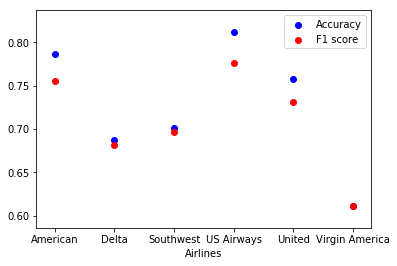

In [31]:
#Q3 Plotting Kfold cross validatioin result to a graph
print("From following graph, accuracy difference is around .2 across airlines.")
print("Accuracy is highest for US Airways and lowest for Virgin America with range of 0.61-0.81")
print("F1 score closely follows accuracy and highest for US Airways.")
print("With information, we can see that it is easier to predict sentiment from tweets about US Airways")
airlines = q3scores[:,0]
accuracy = pd.to_numeric(q3scores[:,1])
f1score = pd.to_numeric(q3scores[:,2])

plt.scatter(airlines, accuracy, label = 'Accuracy', color = 'b')
plt.scatter(airlines, f1score, label = 'F1 score', color = 'r')
plt.xlabel('Airlines')
plt.legend(loc = 'upper right')
plt.show()

In [32]:
#Q4: Repeat Q3 with multinomial Naïve Bayes classifier, and compare your result with Q3. analyse

q4scores = []
scores = []
for aline in set(df['airline']):
    dfi = df[df['airline']==aline]
    X = np.array(dfi['text'])
    y = np.array(dfi['airline_sentiment'])
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)

    KFold(n_splits=10, random_state=None, shuffle=False)
    for train_index, test_index in kf.split(X):
        X_train_text, X_valid_text = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        X_train = count.fit_transform(X_train_text)
        X_valid = count.transform(X_valid_text)

        MNB = MultinomialNB(1e-10)
        MNB.fit(X_train, y_train)

        p_valid = MNB.predict(X_valid)
        scores.append([accuracy_score(y_valid, p_valid), f1_score(y_valid, p_valid, average='weighted')])
    q4scores.append([aline, np.array(scores)[:,0].mean(0), np.array(scores)[:,1].mean(0)])
    scores=[]
q4scores = np.array(q4scores)
print("Q4: Kfold cross validation of Multinomial NB by airlines.")
print(q4scores)


[['American' '0.75136627141' '0.730502202548']
 ['United' '0.729456071521' '0.710443179665']
 ['US Airways' '0.804679188439' '0.783347290772']
 ['Delta' '0.64315234517' '0.631578904259']
 ['Southwest' '0.669421487603' '0.662705611719']
 ['Virgin America' '0.497960784314' '0.495356650374']]


Result from Multinomial NB pattern is almost same as that of Logistic regression graph.
Accuracy range is around .3 and highest with US Airways and lowest with Virgin america.
F1 score is a little less than accuracy and same highest and lowest airlines.
Selection of model for sentiment analysis does not matter much.


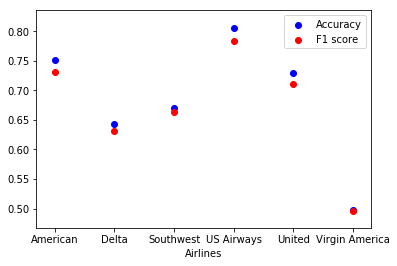

In [34]:
#Q4 Plotting Multinomial NB Kfold cross validation result into a graph
print("Result from Multinomial NB pattern is almost same as that of Logistic regression graph.")
print("Accuracy range is around .3 and highest with US Airways and lowest with Virgin america.")
print("F1 score is a little less than accuracy and same highest and lowest airlines.")
print("Selection of model for sentiment analysis does not matter much.")
airlines = q4scores[:,0]
accuracy = pd.to_numeric(q4scores[:,1])
f1score = pd.to_numeric(q4scores[:,2])

plt.scatter(airlines, accuracy, label = 'Accuracy', color = 'b')
plt.scatter(airlines, f1score, label = 'F1 score', color = 'r')
plt.xlabel('Airlines')
plt.legend(loc = 'upper right')
plt.show()

In [35]:
#Q5: Join all airlines together then train logistic regression and multinomial Naïve Bayes 
#with 10-folds cross-validation and analyze your result. 
scores = []
kf = KFold(n_splits=10) #10 fold cross validation
for train, valid in kf.split(df['airline_sentiment']):
    X_train_text = df['text'][train]
    y_train = df['airline_sentiment'][train]
    X_valid_text = df['text'][valid]
    y_valid = df['airline_sentiment'][valid]
    
    #Logistic regression
    X_trainLG = tfidf.fit_transform(X_train_text)
    X_validLG = tfidf.transform(X_valid_text)
    LR = LogisticRegression(C=5)
    LR.fit(X_trainLG, y_train)
    p_validLG = LR.predict(X_validLG)
    
    #Multinomial NB
    X_trainMNB = count.fit_transform(X_train_text)
    X_validMNB = count.transform(X_valid_text)
    MNB = MultinomialNB(1e-10)
    MNB.fit(X_trainMNB, y_train)
    p_validMNB = MNB.predict(X_validMNB)
    scores.append([accuracy_score(y_valid, p_validLG), f1_score(y_valid, p_validLG, average='weighted'), 
                  accuracy_score(y_valid, p_validMNB), f1_score(y_valid, p_validMNB, average='weighted')])  

scores = np.array(scores)
print("Q5: 10 fold cross validation of both Logistic regression and Multinomial NB on whole data")
print(scores)

Q5: 10 fold cross validation of both Logistic regression and Multinomial NB on whole data
[[ 0.74863388  0.73719153  0.70355191  0.6917608 ]
 [ 0.78142077  0.77221252  0.7636612   0.75391903]
 [ 0.76229508  0.74994449  0.73019126  0.71664832]
 [ 0.74795082  0.74098786  0.70901639  0.69996199]
 [ 0.7226776   0.71974006  0.63319672  0.61754722]
 [ 0.68237705  0.66975771  0.66256831  0.64716027]
 [ 0.81830601  0.80921313  0.79098361  0.77994483]
 [ 0.83674863  0.83083219  0.83811475  0.83332351]
 [ 0.78620219  0.77654371  0.75409836  0.74315569]
 [ 0.82172131  0.82099798  0.80532787  0.80278637]]


From following two graphs, F1 score closely follows Accuracy, both of them ranging from .66 to .83
Highest values are attained at 8th fold and lowest at 6th for Logistic regression.
Multinomial NB has little bit different pattern across folds, but accuracy and f1 scores are similar.
Lowest value is at 5th fold and highest value is at 8th.


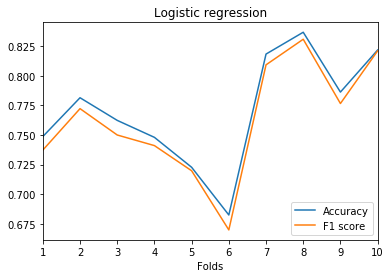

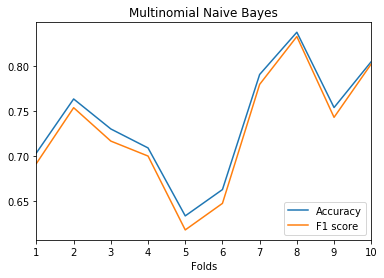

In [36]:
#Q5 Plotting result to a graph
print("From following two graphs, F1 score closely follows Accuracy, both of them ranging from .66 to .83")
print("Highest values are attained at 8th fold and lowest at 6th for Logistic regression.")
print("Multinomial NB has little bit different pattern across folds, but accuracy and f1 scores are similar.")
print("Lowest value is at 5th fold and highest value is at 8th.")
folds = np.arange(1, 11, 1)
plt.plot(folds, scores[:,0], label = 'Accuracy')
plt.plot(folds, scores[:,1], label = 'F1 score')

plt.title('Logistic regression')
plt.xlabel('Folds')
plt.xlim(folds.min(), folds.max())
plt.legend(loc = 'lower right')
plt.show()

plt.plot(folds, scores[:,2], label = 'Accuracy')
plt.plot(folds, scores[:,3], label = 'F1 score')

plt.title('Multinomial Naive Bayes')
plt.xlabel('Folds')
plt.xlim(folds.min(), folds.max())
plt.legend(loc = 'lower right')
plt.show()

In [37]:
#Q6: Randomly select 20% of joined data and reserve that for the validation purpose, and the remaining data for the training 
#purpose. Generate a learning curve by gradually adding training data (e.g. using 5, 10, 15, ..., 80 percent for the training). 
#Plot the accuracy of logistic regression and multinomial Naïve Bayes (on one plot) and analyze your results. look at top featu
#res.
df = df.sample(frac=1, random_state= 100)

X_train_text = df['text'][:11712]
y_train = df['airline_sentiment'][:11712]
X_valid_text = df['text'][11712:]
y_valid = df['airline_sentiment'][11712:]

print(y_train.shape, y_valid.shape)

scores = []
for i in range(732, 11713, 732):
    X_train_text = df['text'][:i]
    y_train = df['airline_sentiment'][:i]
    #Logistic regression
    X_train = tfidf.fit_transform(X_train_text)
    X_valid = tfidf.transform(X_valid_text)
    LR = LogisticRegression(C = 10)
    LR.fit(X_train, y_train)
    p_validLR = LR.predict(X_valid)
    #Multinomial NB
    X_trainMNB = count.fit_transform(X_train_text)
    X_validMNB = count.transform(X_valid_text)
    MNB = MultinomialNB(1e-10)
    MNB.fit(X_trainMNB, y_train)
    p_validMNB = MNB.predict(X_validMNB)
    
    scores.append([accuracy_score(y_valid, p_validLR), accuracy_score(y_valid, p_validMNB)])

scores = np.array(scores)


(11712,) (2928,)


From following graph, it is visible that Logistic regression has better accuracy than Multinomial NB.
As the training size increases, accuracy increases for both model.
For Logistic regression, after training size became 8000, accuracy increase slowed down.
On the contrary, Multinomial NB accuracy increases as the training size increases.


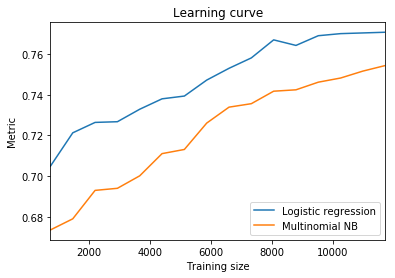

In [38]:
#Q6 continuation, displaying Learning curve plot
print("From following graph, it is visible that Logistic regression has better accuracy than Multinomial NB.")
print("As the training size increases, accuracy increases for both model.")
print("For Logistic regression, after training size became 8000, accuracy increase slowed down.")
print("On the contrary, Multinomial NB accuracy increases as the training size increases.")
%matplotlib inline

size = np.arange(732, 11713, 732)
plt.title("Learning curve")

plt.plot(size, scores[:, 0], label = 'Logistic regression')
plt.plot(size, scores[:, 1], label = 'Multinomial NB')

plt.xlabel('Training size')
plt.ylabel('Metric')
plt.xlim(size.min(), size.max())
plt.legend(loc = 'lower right')
plt.show()

In [39]:
#Q6 Displaying top 10 features from both vectorizer.

vocabMNB = np.array(count.get_feature_names())
vocabLR = np.array(tfidf.get_feature_names())

freqMNB = X_trainMNB.sum(0).A1
orderMNB = freqMNB.argsort()[::-1]
print("Q6: Count vectorizer top features: %s" % vocabMNB[orderMNB[:10]])

freqLR = X_train.sum(0).A1
orderLR = freqLR.argsort()[::-1]
print("Tfidf vectorizer top features: %s" % vocabLR[orderLR[:10]])
print("Common words in both vectorizers are:")
print(set(np.append(vocabMNB[orderMNB[:10]], vocabLR[orderLR[:10]])))

Q6: Count vectorizer top features: ['flight' 'thanks' 'cancelled' 'service' 'just' 'help' 'time' 'customer'
 'amp' 'hours']
Tfidf vectorizer top features: ['flight' 'thanks' 'thank' 'cancelled' 'service' 'just' 'help' 'time'
 'customer' 'hours']
Common words in both vectorizers are:
{'flight', 'time', 'cancelled', 'amp', 'hours', 'thanks', 'help', 'thank', 'customer', 'just', 'service'}
